In [3]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Ruta al archivo CSV
input_csv_path = '../keywords/espanol/spanishpreprocessed_texts.csv'
output_csv_path = 'tfidf_vectors.csv'


In [5]:
import os
print(os.getcwd())

c:\Users\NICO\Desktop\USFQ\NOVENO_SEMESTRE\Proyecto_Integrador\GitHub\Proyecto_Integrador\Sistema_de_Recomendacion\document_vectorization


In [6]:
# Leer el archivo CSV
data = pd.read_csv(input_csv_path)

# Asegurarse de que tenga las columnas correctas
if data.shape[1] < 2:
    raise ValueError("El archivo CSV debe tener al menos dos columnas: [Nombre del archivo, Texto preprocesado]")


In [7]:
# Separar nombres y textos
file_names = data.iloc[:, 0]  # Primera columna: nombres de archivos
texts = data.iloc[:, 1]      # Segunda columna: textos preprocesados

In [8]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Crear una lista de stopwords en español
spanish_stopwords = stopwords.words('spanish')

# Inicializar el vectorizador TF-IDF con soporte para español
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NICO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Crear la matriz TF-IDF
tfidf_matrix = vectorizer.fit_transform(texts)

# Convertir la matriz a formato denso
tfidf_dense = tfidf_matrix.toarray()

# Obtener los nombres de las características (términos)
feature_names = vectorizer.get_feature_names_out()


In [10]:
# Crear un DataFrame de la matriz TF-IDF
df = pd.DataFrame(tfidf_dense, columns=feature_names)

# Agregar los nombres de archivo como primera columna
df.insert(0, "File_Name", file_names)

# Guardar el DataFrame en un archivo CSV
df.to_csv(output_csv_path, index=False, encoding='utf-8')
print(f"Vectores TF-IDF guardados en {output_csv_path}!")

Vectores TF-IDF guardados en tfidf_vectors.csv!


## 1. **Cosine Similarity**
- **Explanation**: Measures the cosine of the angle between two vectors in a multi-dimensional space. Values range from -1 (opposite direction) to 1 (same direction).
- **Formula**:
  
$$ \text{Cosine Similarity} = \frac{\vec{A} \cdot \vec{B}}{| \vec{A} | | \vec{B} |} $$

## 2. **Euclidean Distance**
- **Explanation**: Computes the straight-line (or Euclidean) distance between two points in a space.
- **Formula**:
  $$ d(\vec{A}, \vec{B}) = \sqrt{\sum_{i=1}^n (A_i - B_i)^2} $$

## 3. **Jaccard Similarity**
- **Explanation**: Measures the overlap between two sets. Used primarily for binary data.
- **Formula**:
  $$ J(A, B) = \frac{|A \cap B|}{|A \cup B|} $$

## 4. **Pearson Correlation**
- **Explanation**: Measures the linear correlation between two vectors. Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation).
- **Formula**:
  $$ r = \frac{\sum_{i=1}^n (A_i - \bar{A})(B_i - \bar{B})}{\sqrt{\sum_{i=1}^n (A_i - \bar{A})^2 \sum_{i=1}^n (B_i - \bar{B})^2}} $$

## 5. **Manhattan Distance**
- **Explanation**: Measures the sum of the absolute differences between corresponding elements of two vectors.
- **Formula**:
  $$ d(\vec{A}, \vec{B}) = \sum_{i=1}^n |A_i - B_i| $$

## 6. **KL Divergence**
- **Explanation**: Measures how one probability distribution differs from a reference probability distribution.
- **Formula**:
  $$ D_{KL}(P | Q) = \sum_{i=1}^n P_i \log\left(\frac{P_i}{Q_i}\right) $$

## 7. **Hamming Distance**
- **Explanation**: Measures the proportion of positions at which the corresponding elements of two vectors are different (binary data).
- **Formula**:
  $$ D_{KL}(P | Q) = \sum_{i=1}^n P_i \log\left(\frac{P_i}{Q_i}\right) $$

## 8. **Bhattacharyya Distance**
- **Explanation**: Measures the similarity between two probability distributions.
- **Formula**:
  $$ D_B(P, Q) = -\log\left(\sum_{i=1}^n \sqrt{P_i Q_i}\right) $$

## 9. **Dot Product**
- **Explanation**: Measures the projection of one vector onto another.
- **Formula**:
  $$ \vec{A} \cdot \vec{B} = \sum_{i=1}^n A_i B_i $$

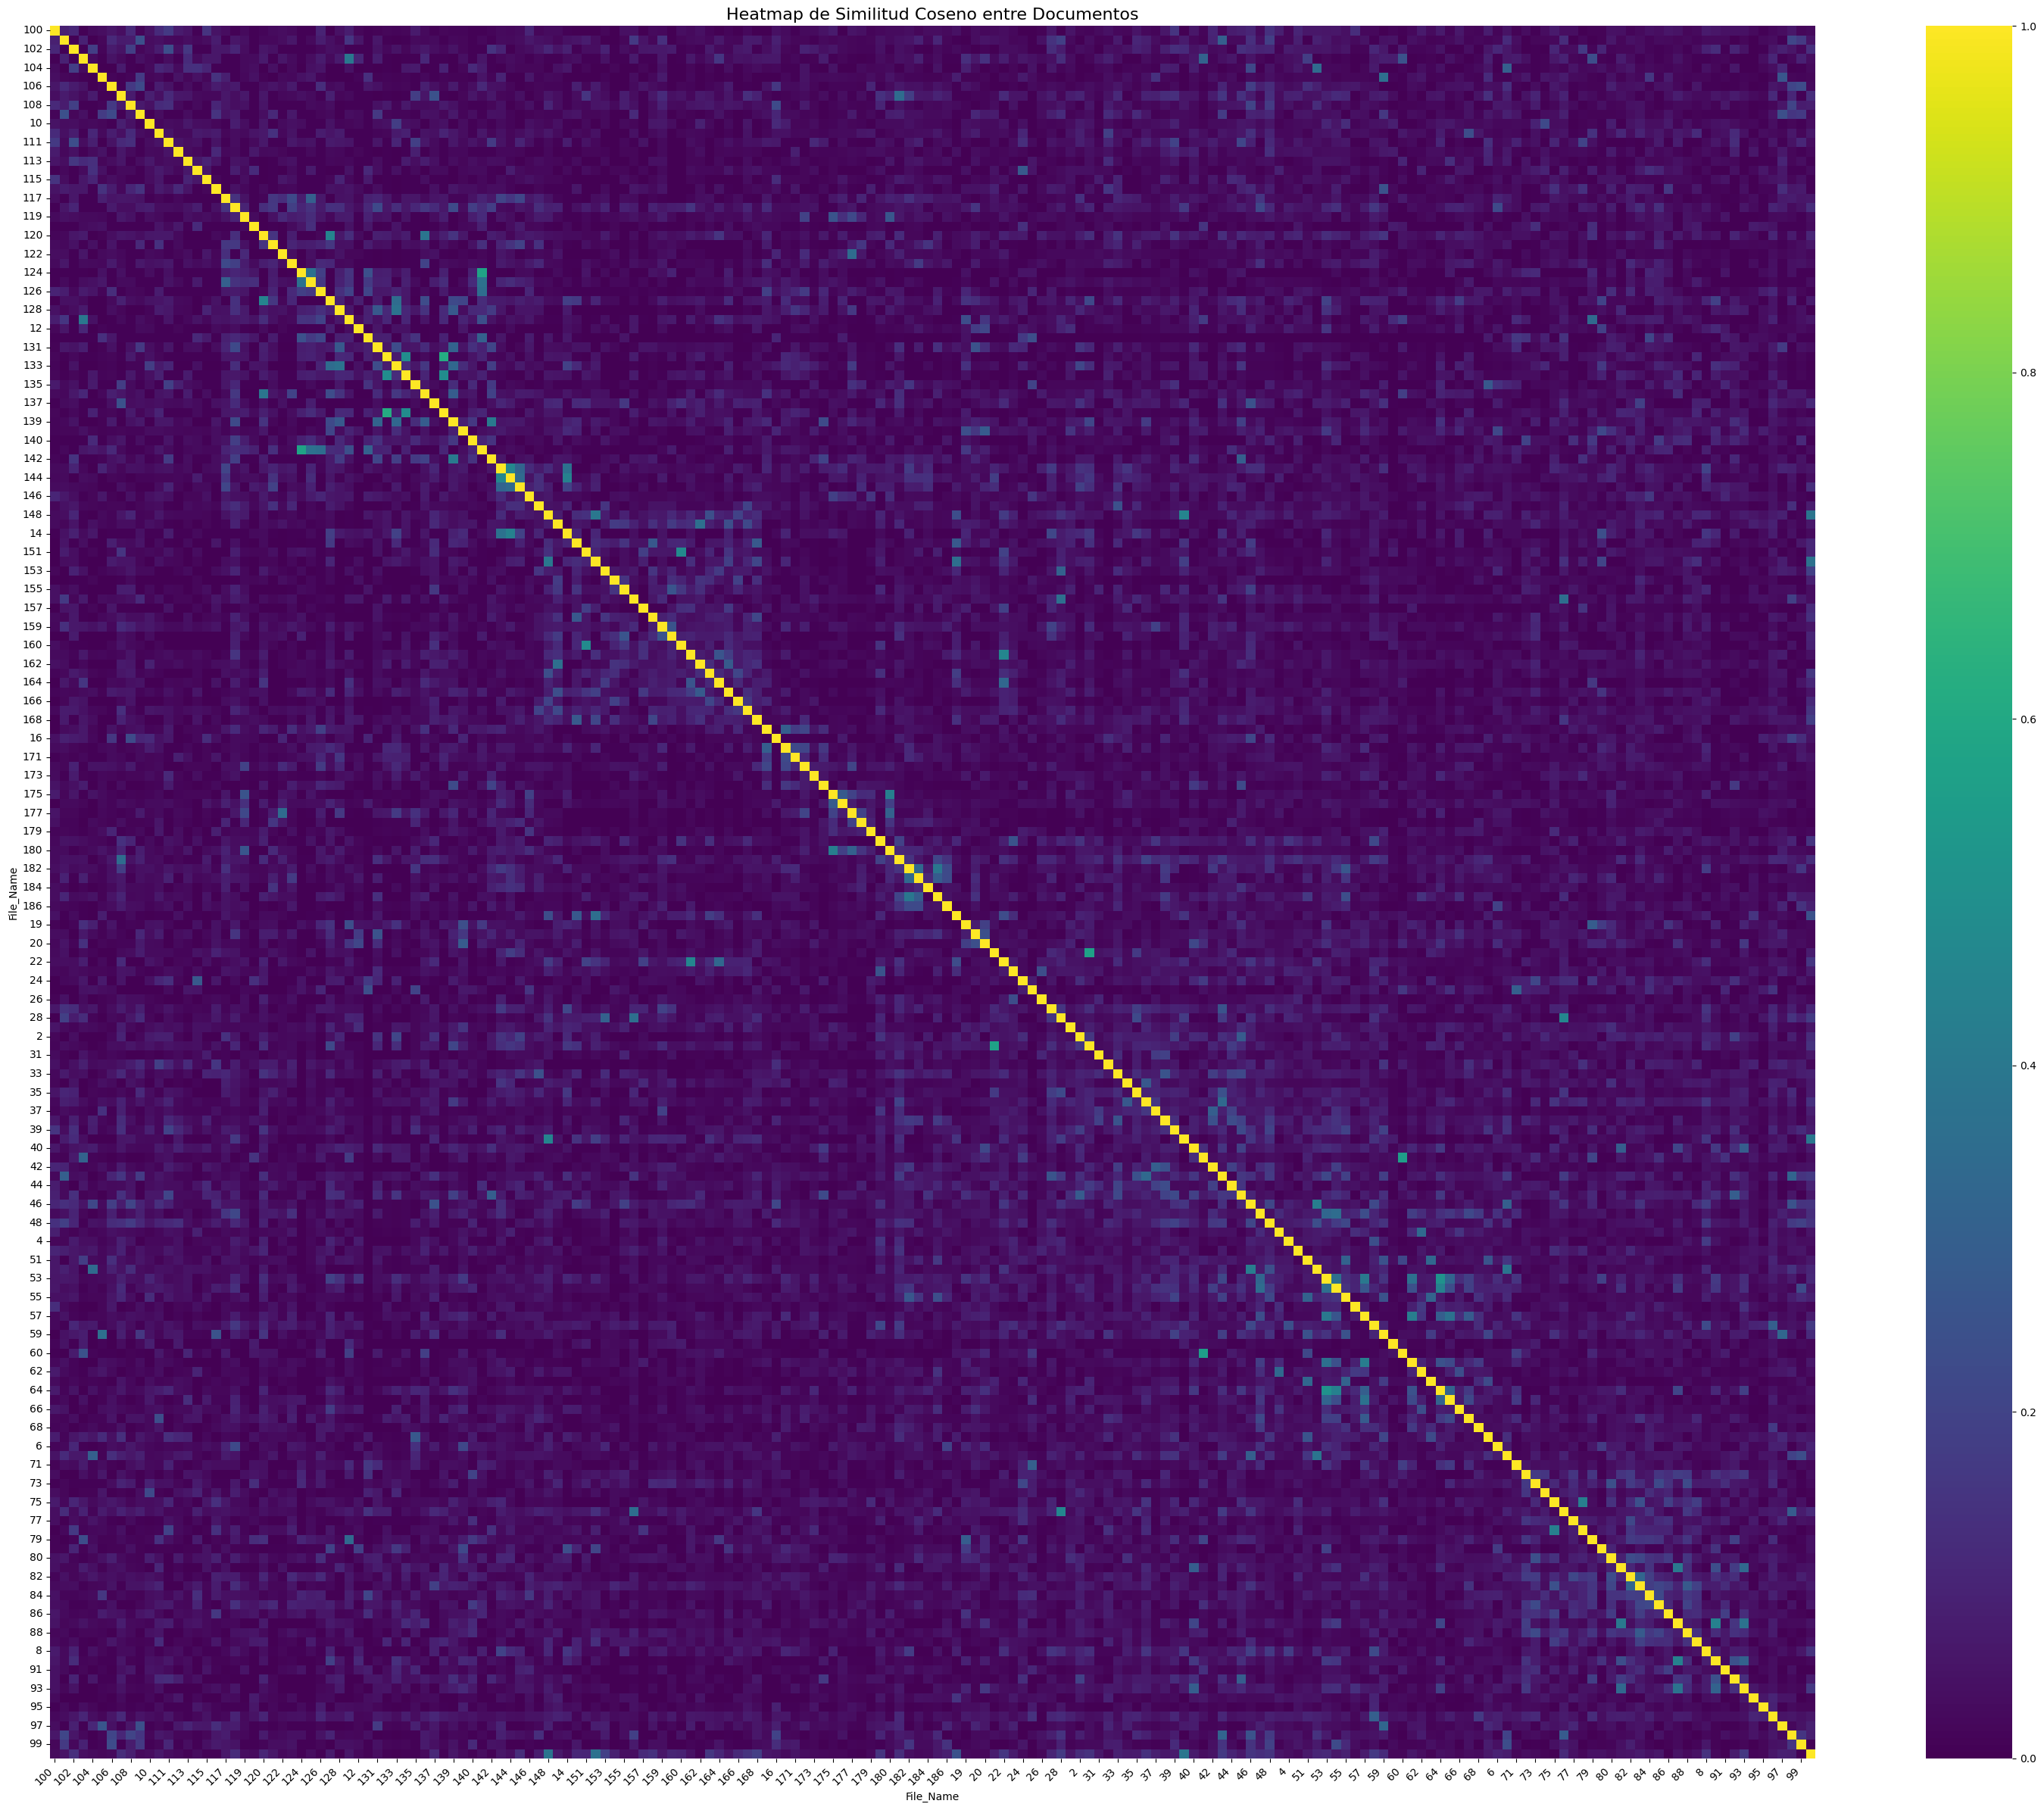

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Ruta al archivo CSV generado anteriormente con los vectores TF-IDF
tfidf_csv_path = 'tfidf_vectors.csv'

# Leer el archivo CSV con los vectores TF-IDF
data = pd.read_csv(tfidf_csv_path)

# Extraer los nombres de los archivos y las características
file_names = data['File_Name'].str.split(' ').str[0]
tfidf_vectors = data.drop(columns=['File_Name']).values

# Calcular la matriz de similitud coseno
cosine_sim_matrix = cosine_similarity(tfidf_vectors)

# Crear un DataFrame para la matriz de similitud con nombres de archivos como etiquetas
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=file_names, columns=file_names)

# Crear el heatmap
plt.figure(figsize=(30, 24))
sns.heatmap(cosine_sim_df, annot=False, cmap="viridis", cbar=True)
plt.title("Heatmap de Similitud Coseno entre Documentos", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el heatmap
plt.show()


In [12]:
# Crear funciones para similitud
def create_heatmap(matrix, title, file_names):
    """Crea y muestra un heatmap basado en la matriz de similitud/diferencia."""
    plt.figure(figsize=(30, 24))
    sns.heatmap(matrix, xticklabels=file_names, yticklabels=file_names, cmap="viridis", cbar=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

## Distancia Euclidiana ##

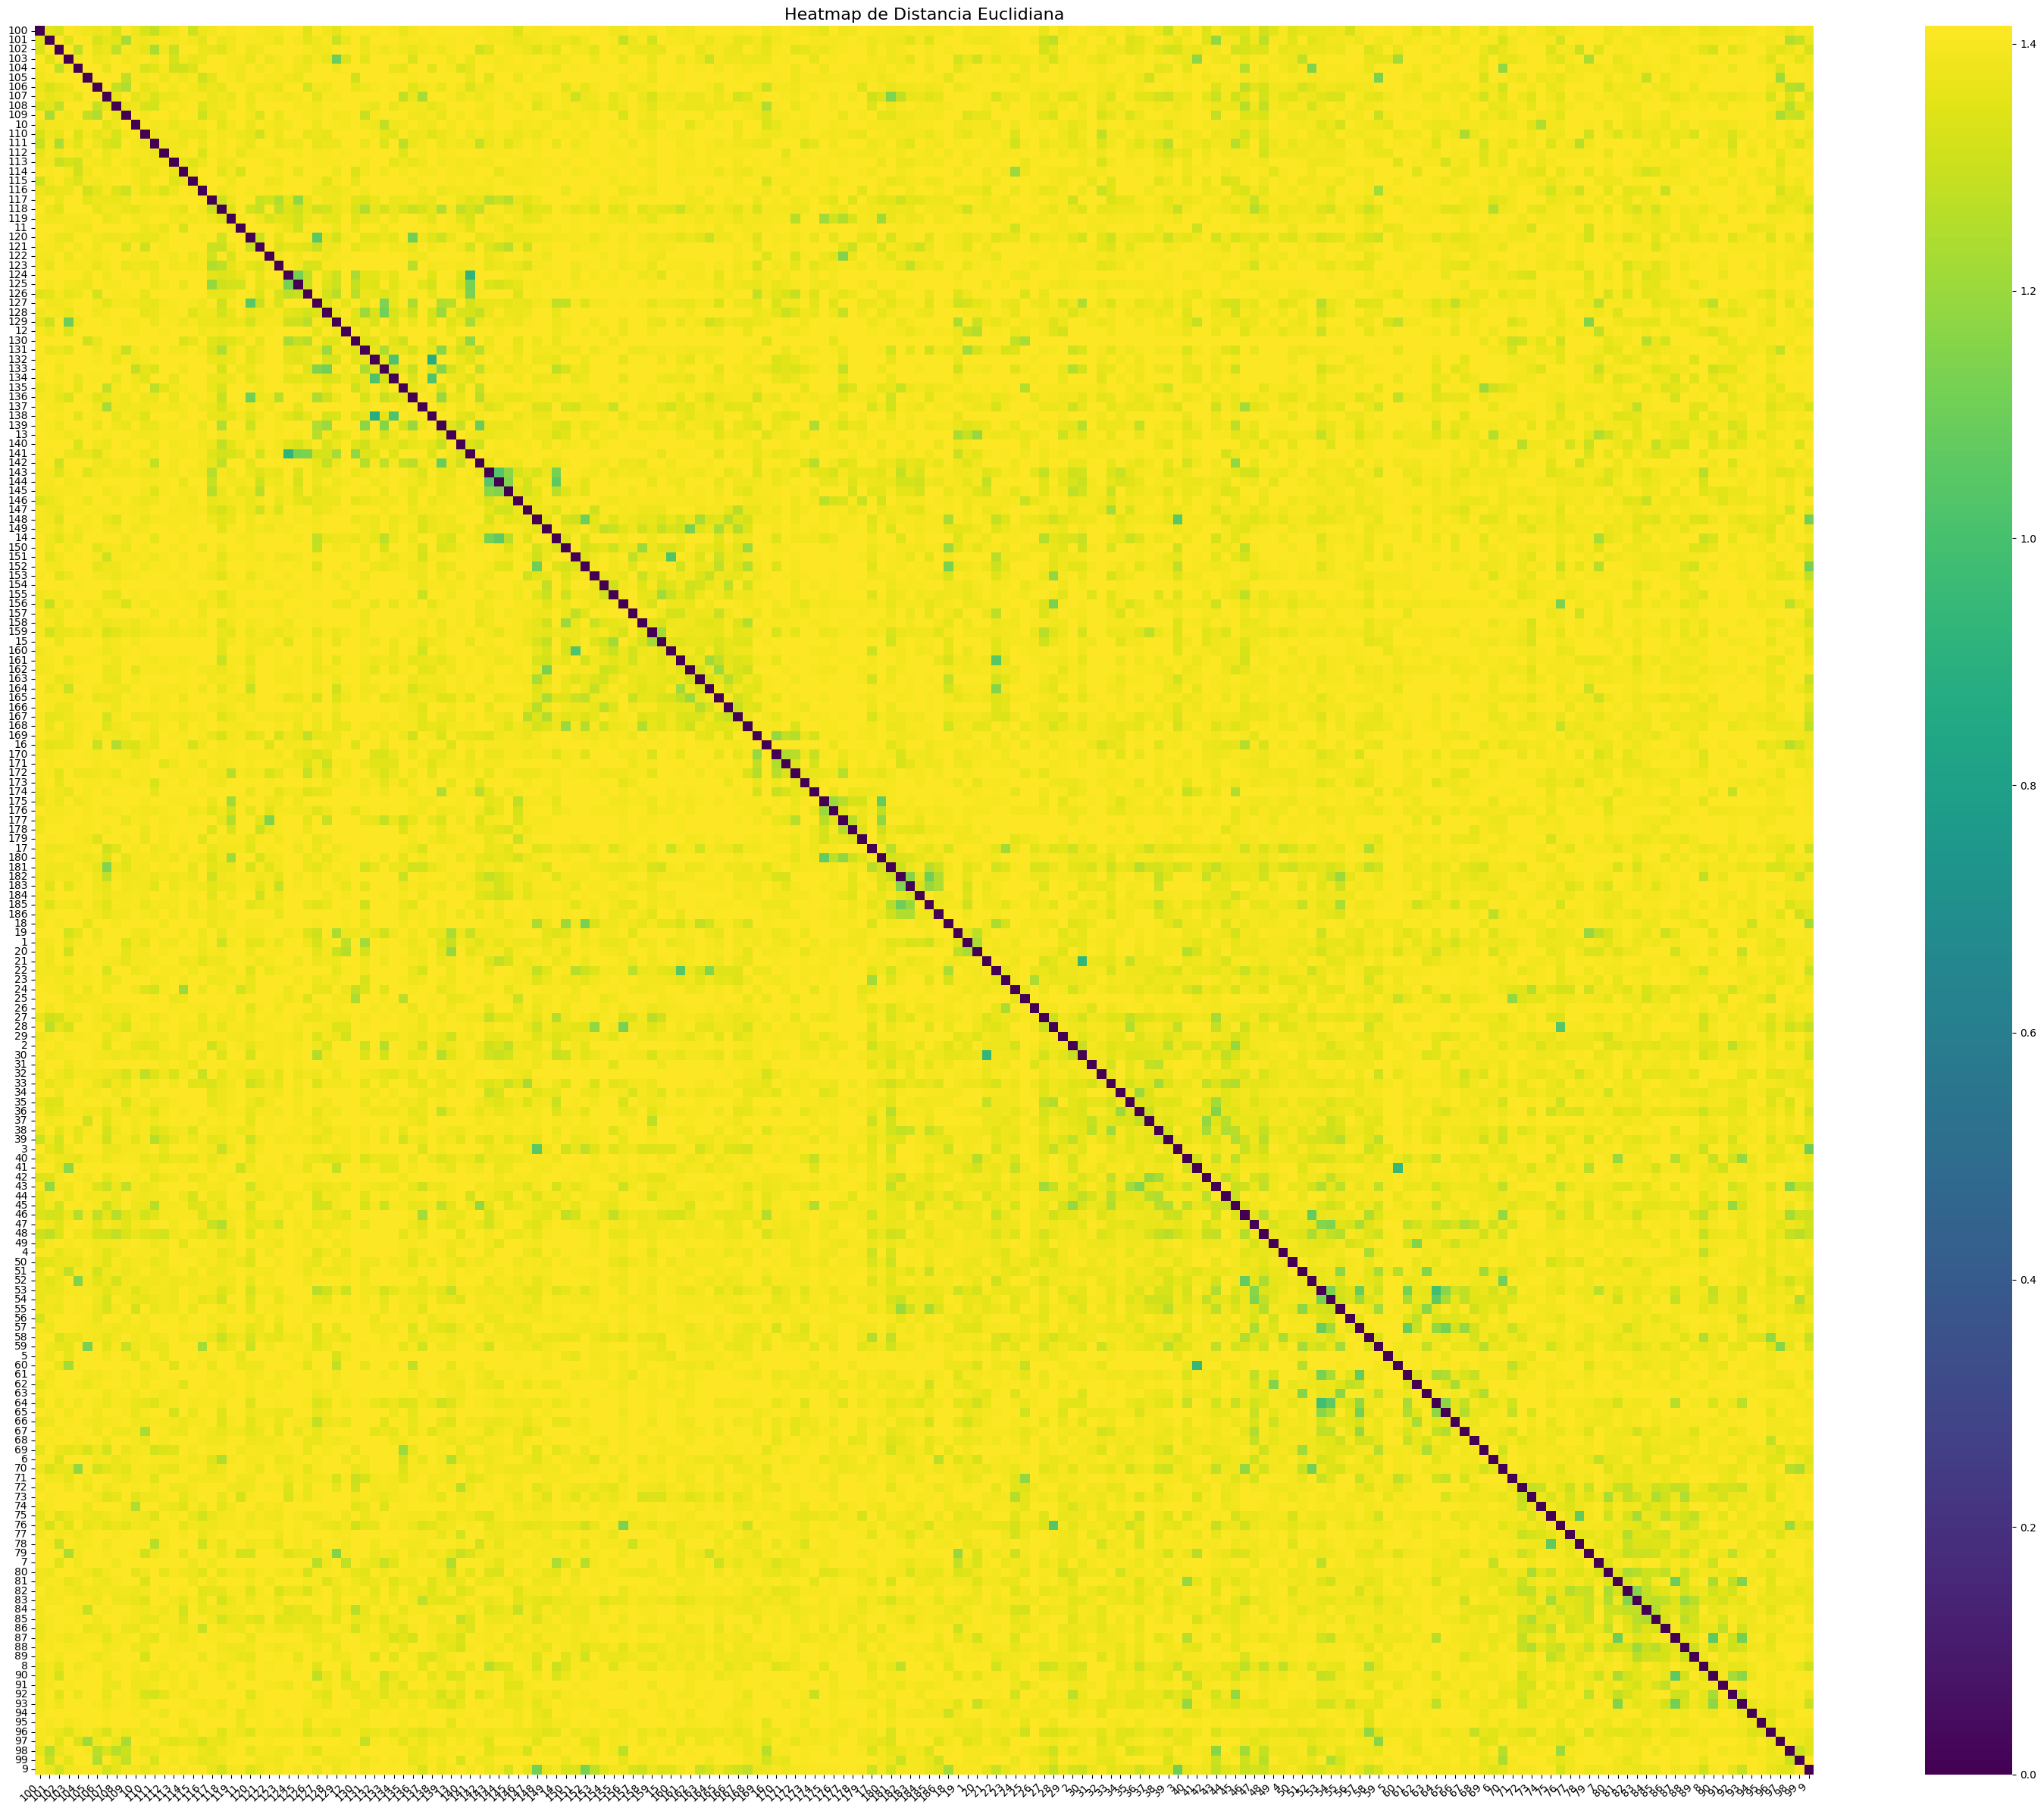

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
# 1. Euclidean Distance Heatmap
euclidean_distance_matrix = pairwise_distances(tfidf_vectors, metric='euclidean')
create_heatmap(euclidean_distance_matrix, "Heatmap de Distancia Euclidiana", file_names)


## Distancia Jaccard ##

c:\Python311\Lib\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


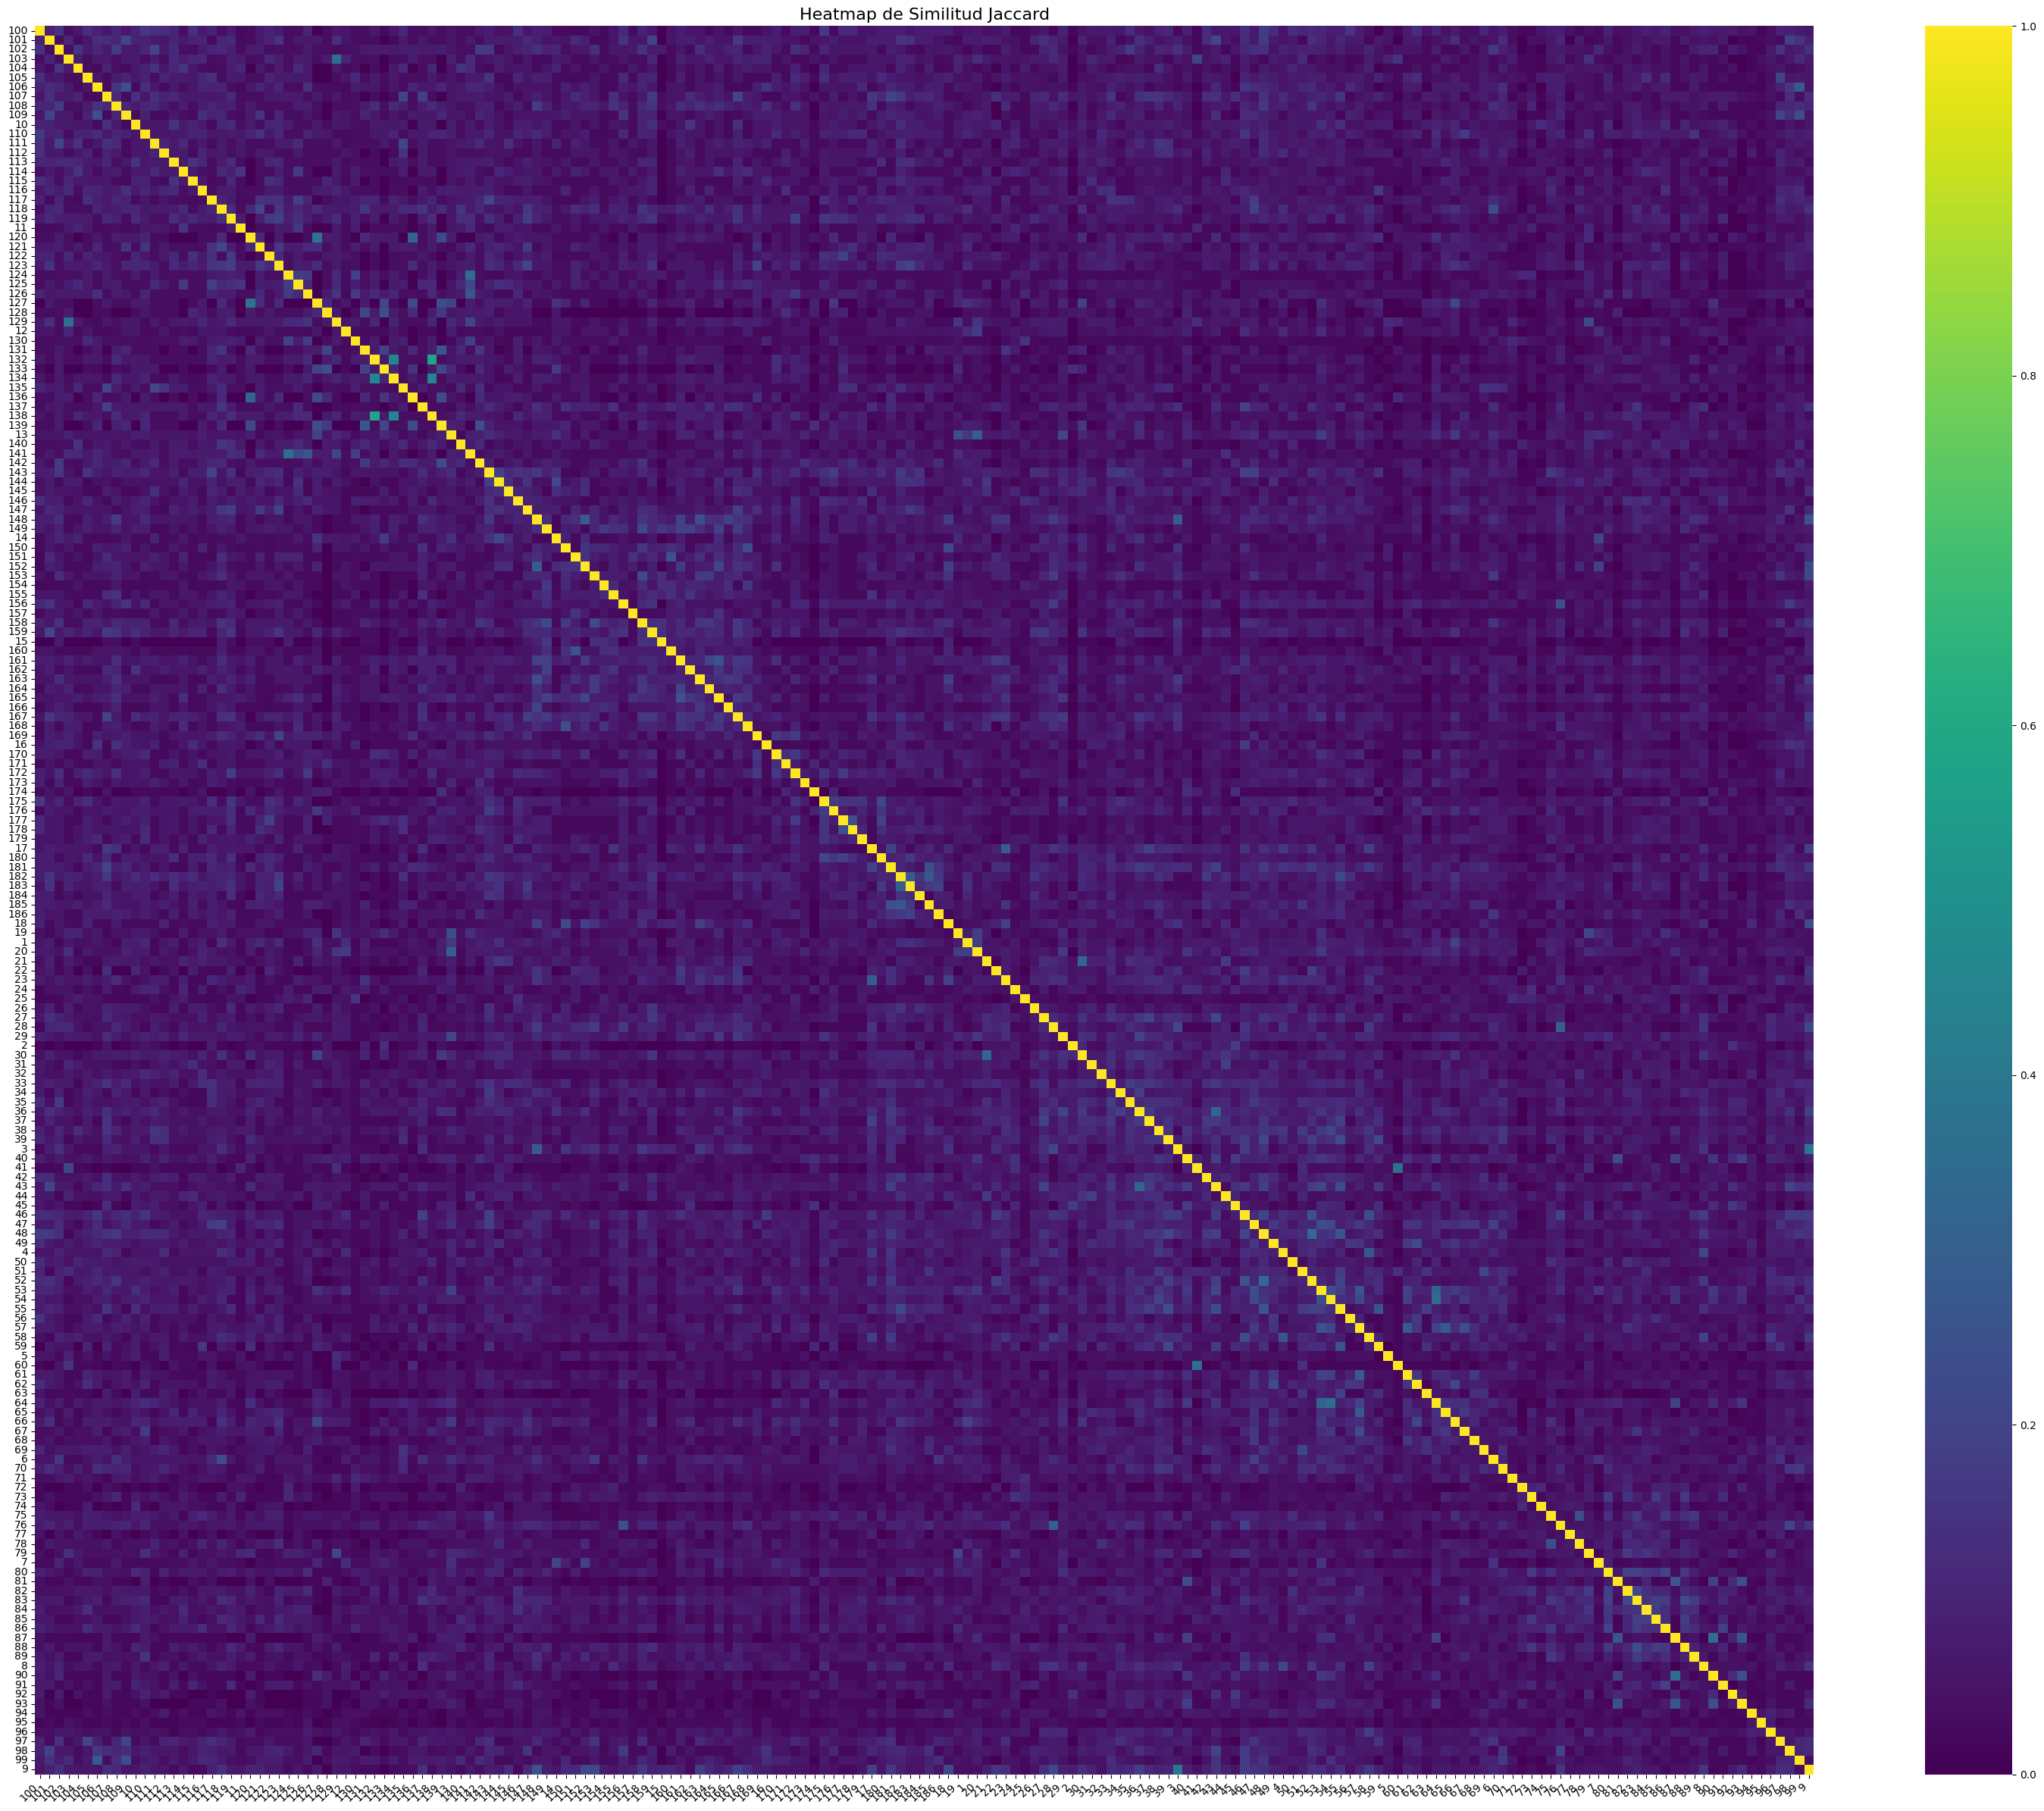

In [14]:
# 2. Jaccard Similarity Heatmap
# Nota: Jaccard funciona mejor para datos binarios. Aquí usamos una aproximación.
jaccard_similarity_matrix = 1 - pairwise_distances(tfidf_vectors, metric='jaccard')
create_heatmap(jaccard_similarity_matrix, "Heatmap de Similitud Jaccard", file_names)

## Pearson Correlation Heatmap

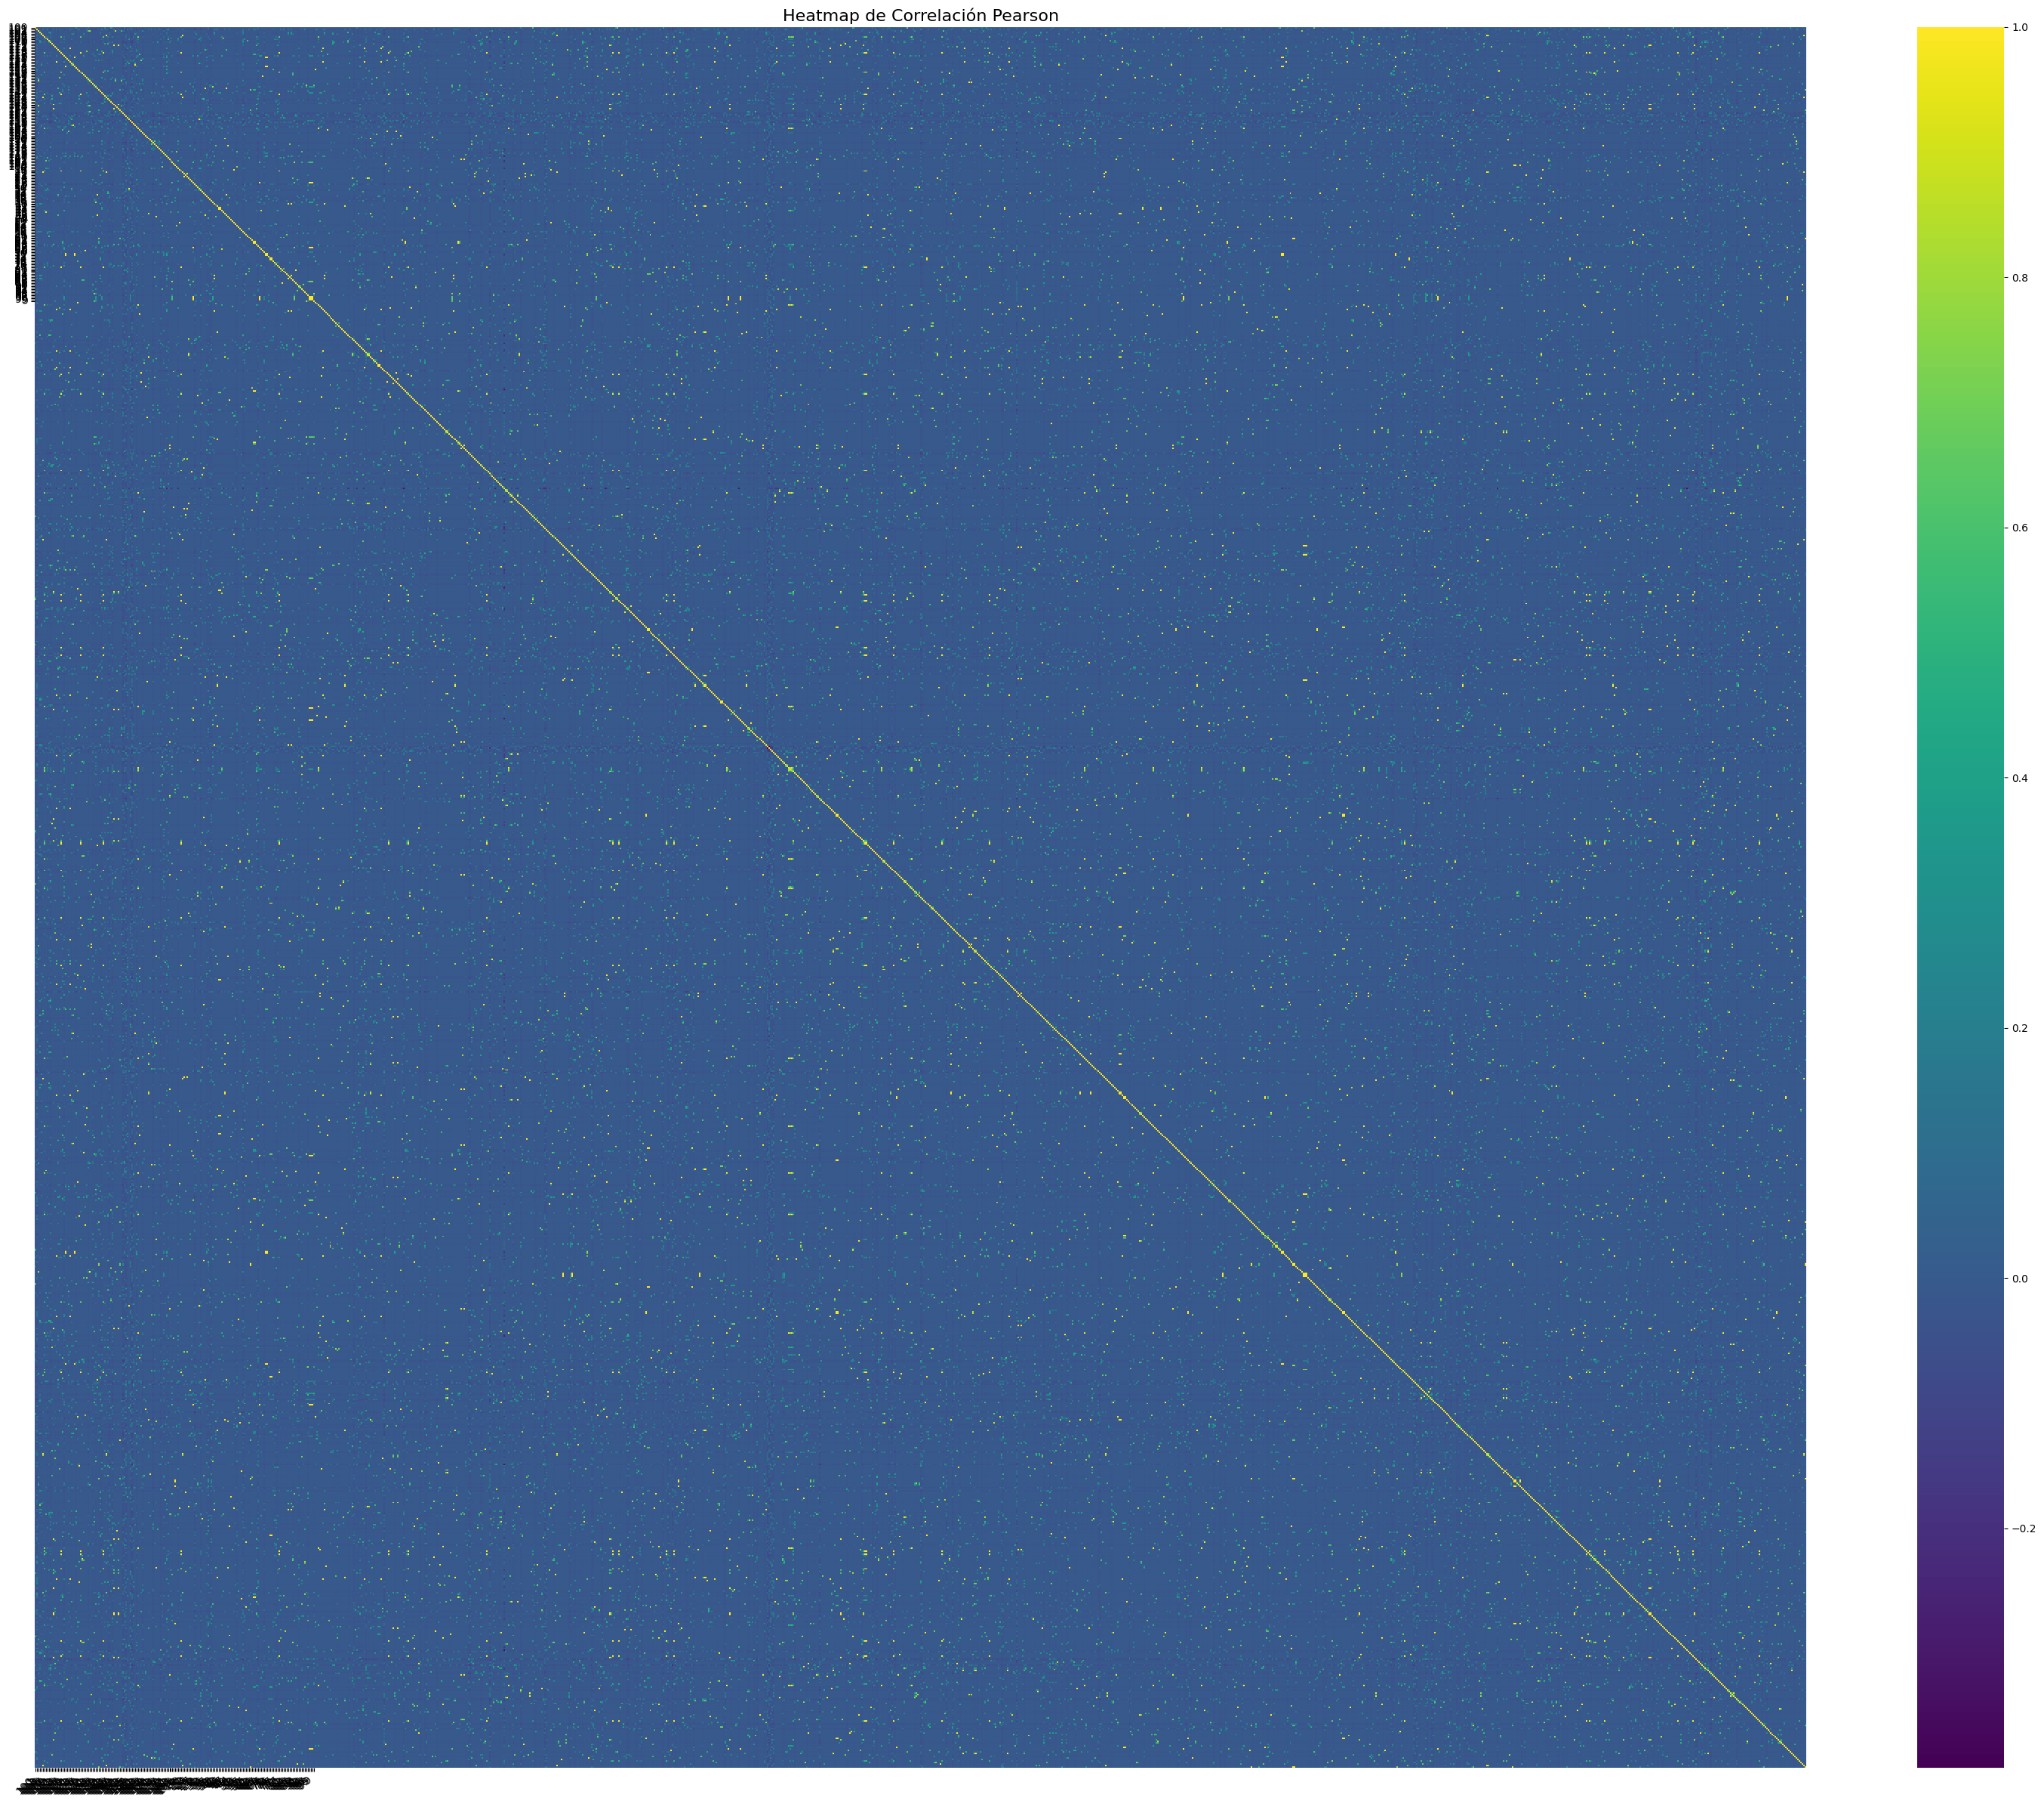

In [15]:
import numpy as np
pearson_correlation_matrix = np.corrcoef(tfidf_vectors.T)
create_heatmap(pearson_correlation_matrix, "Heatmap de Correlación Pearson", file_names)


## Manhattan Distance

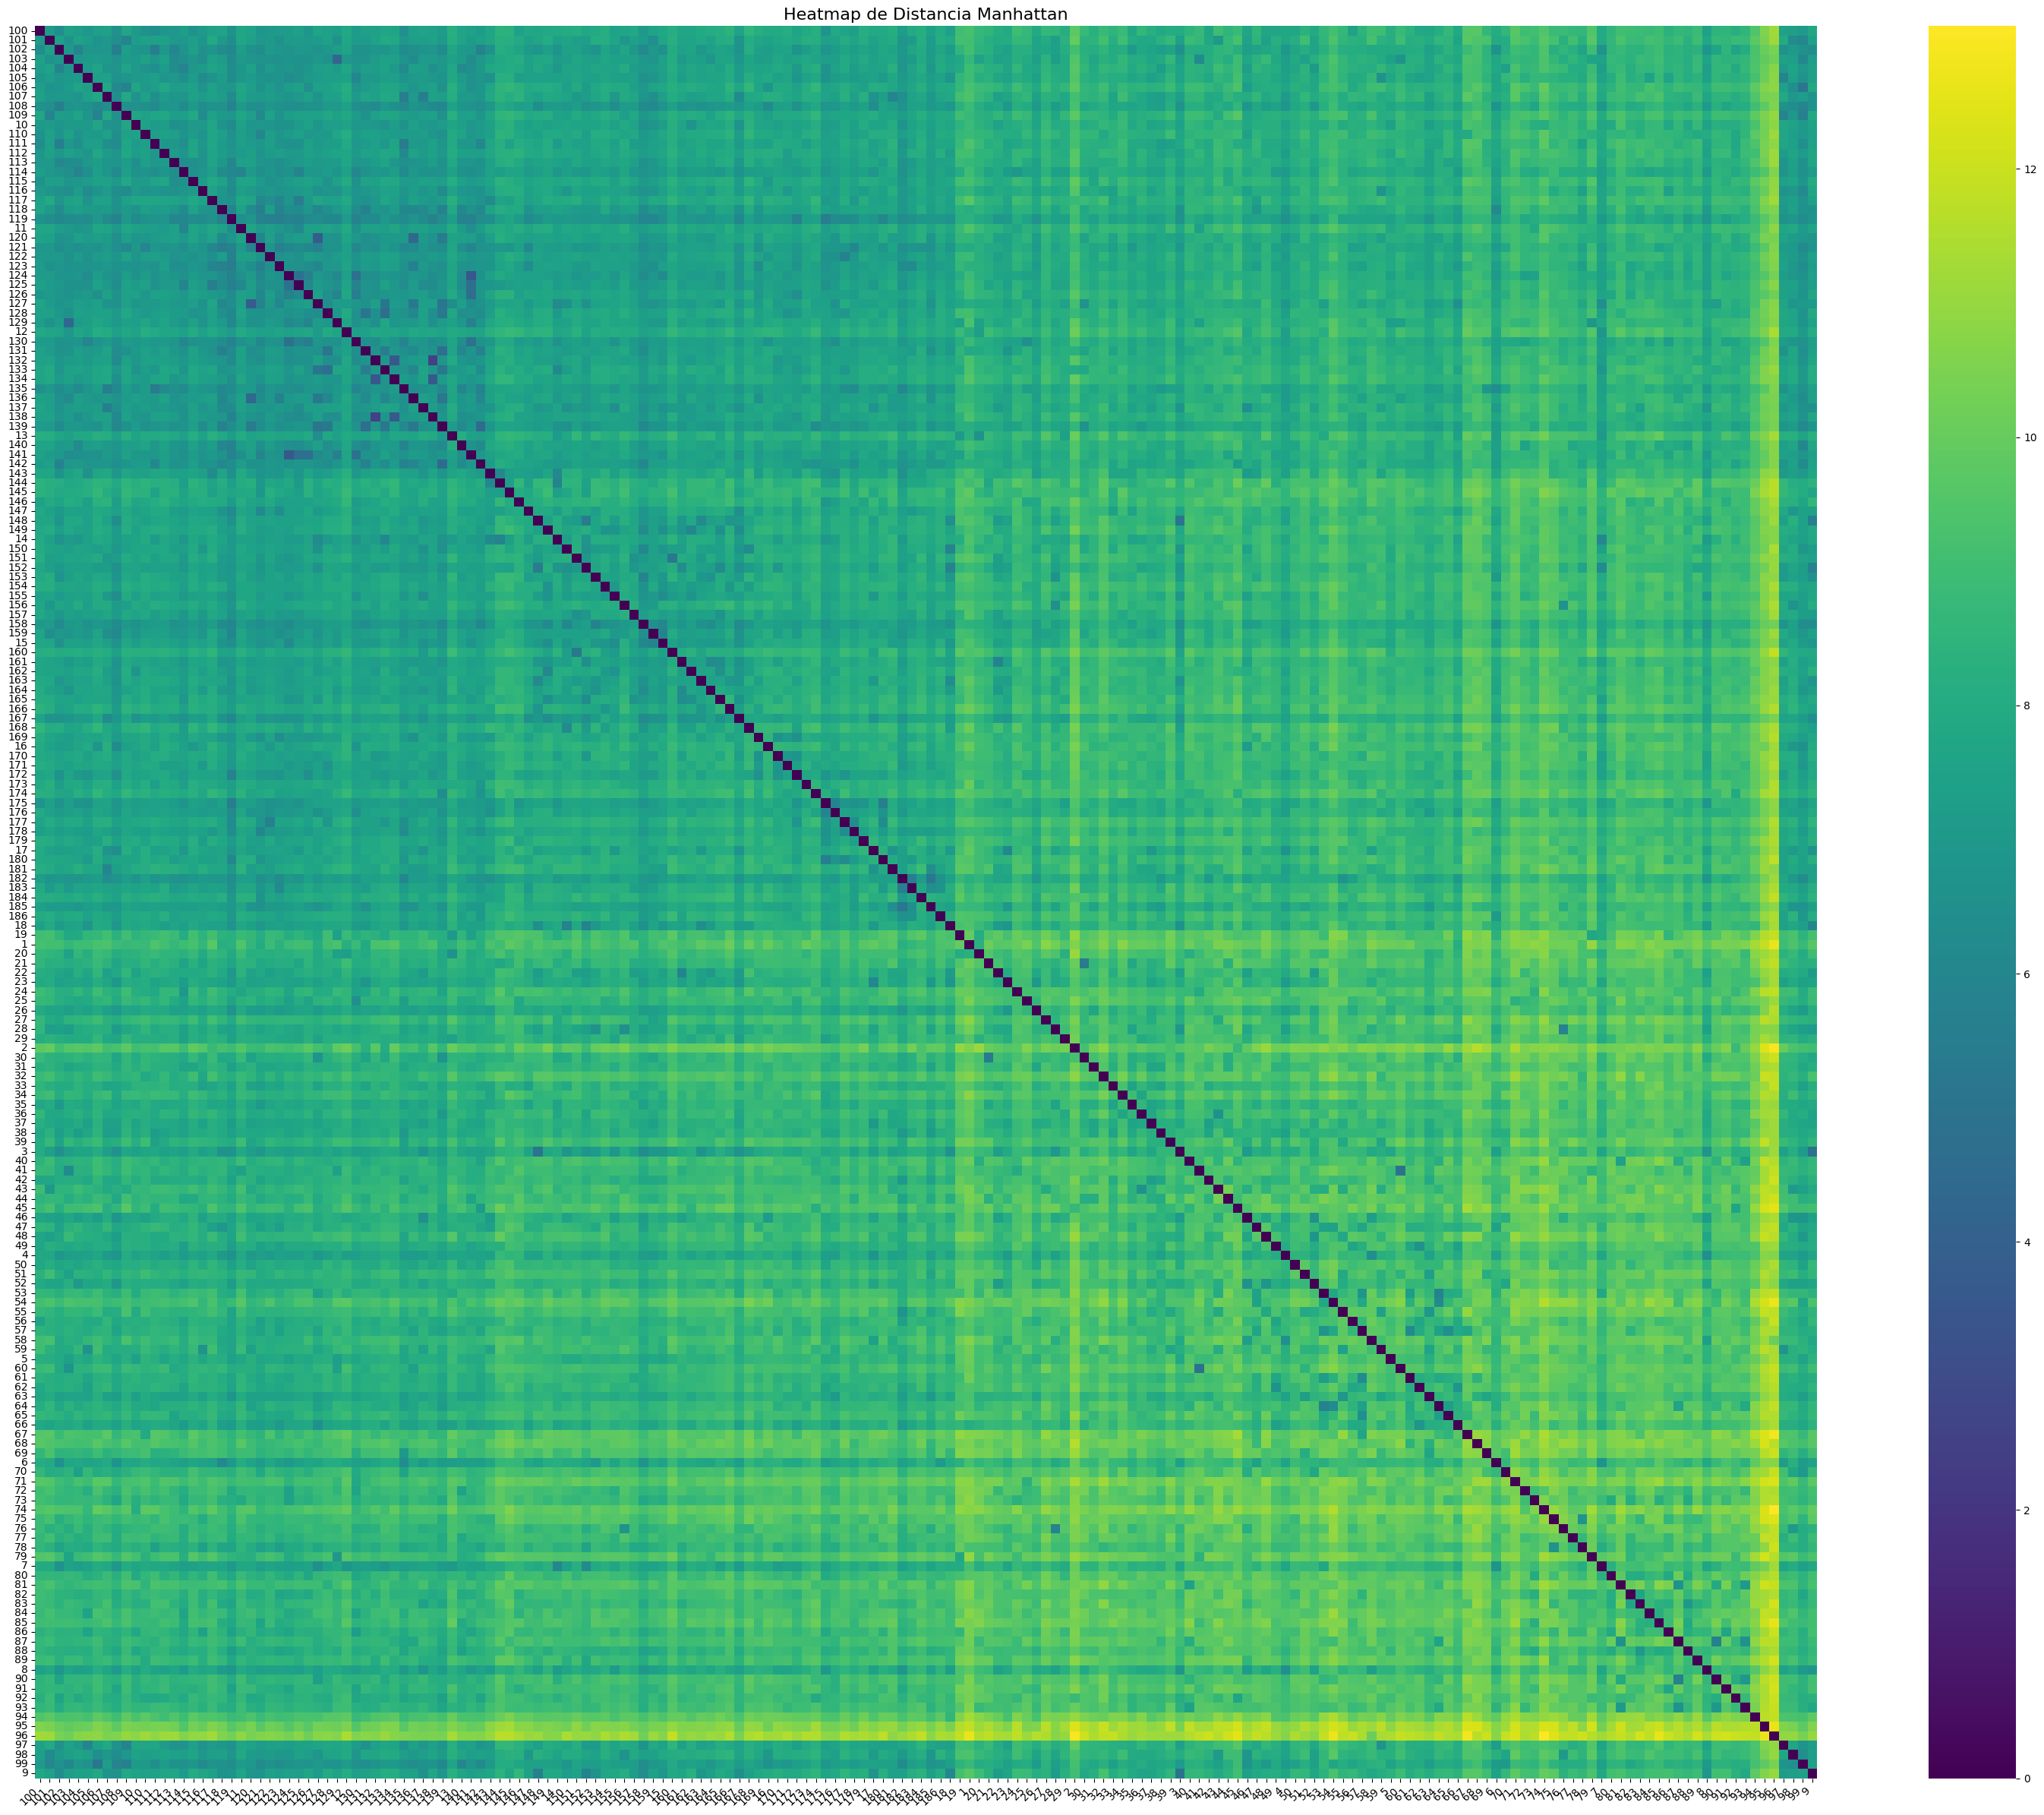

In [16]:
manhattan_distance_matrix = pairwise_distances(tfidf_vectors, metric='manhattan')
create_heatmap(manhattan_distance_matrix, "Heatmap de Distancia Manhattan", file_names)

## KL Divergence HeatMap

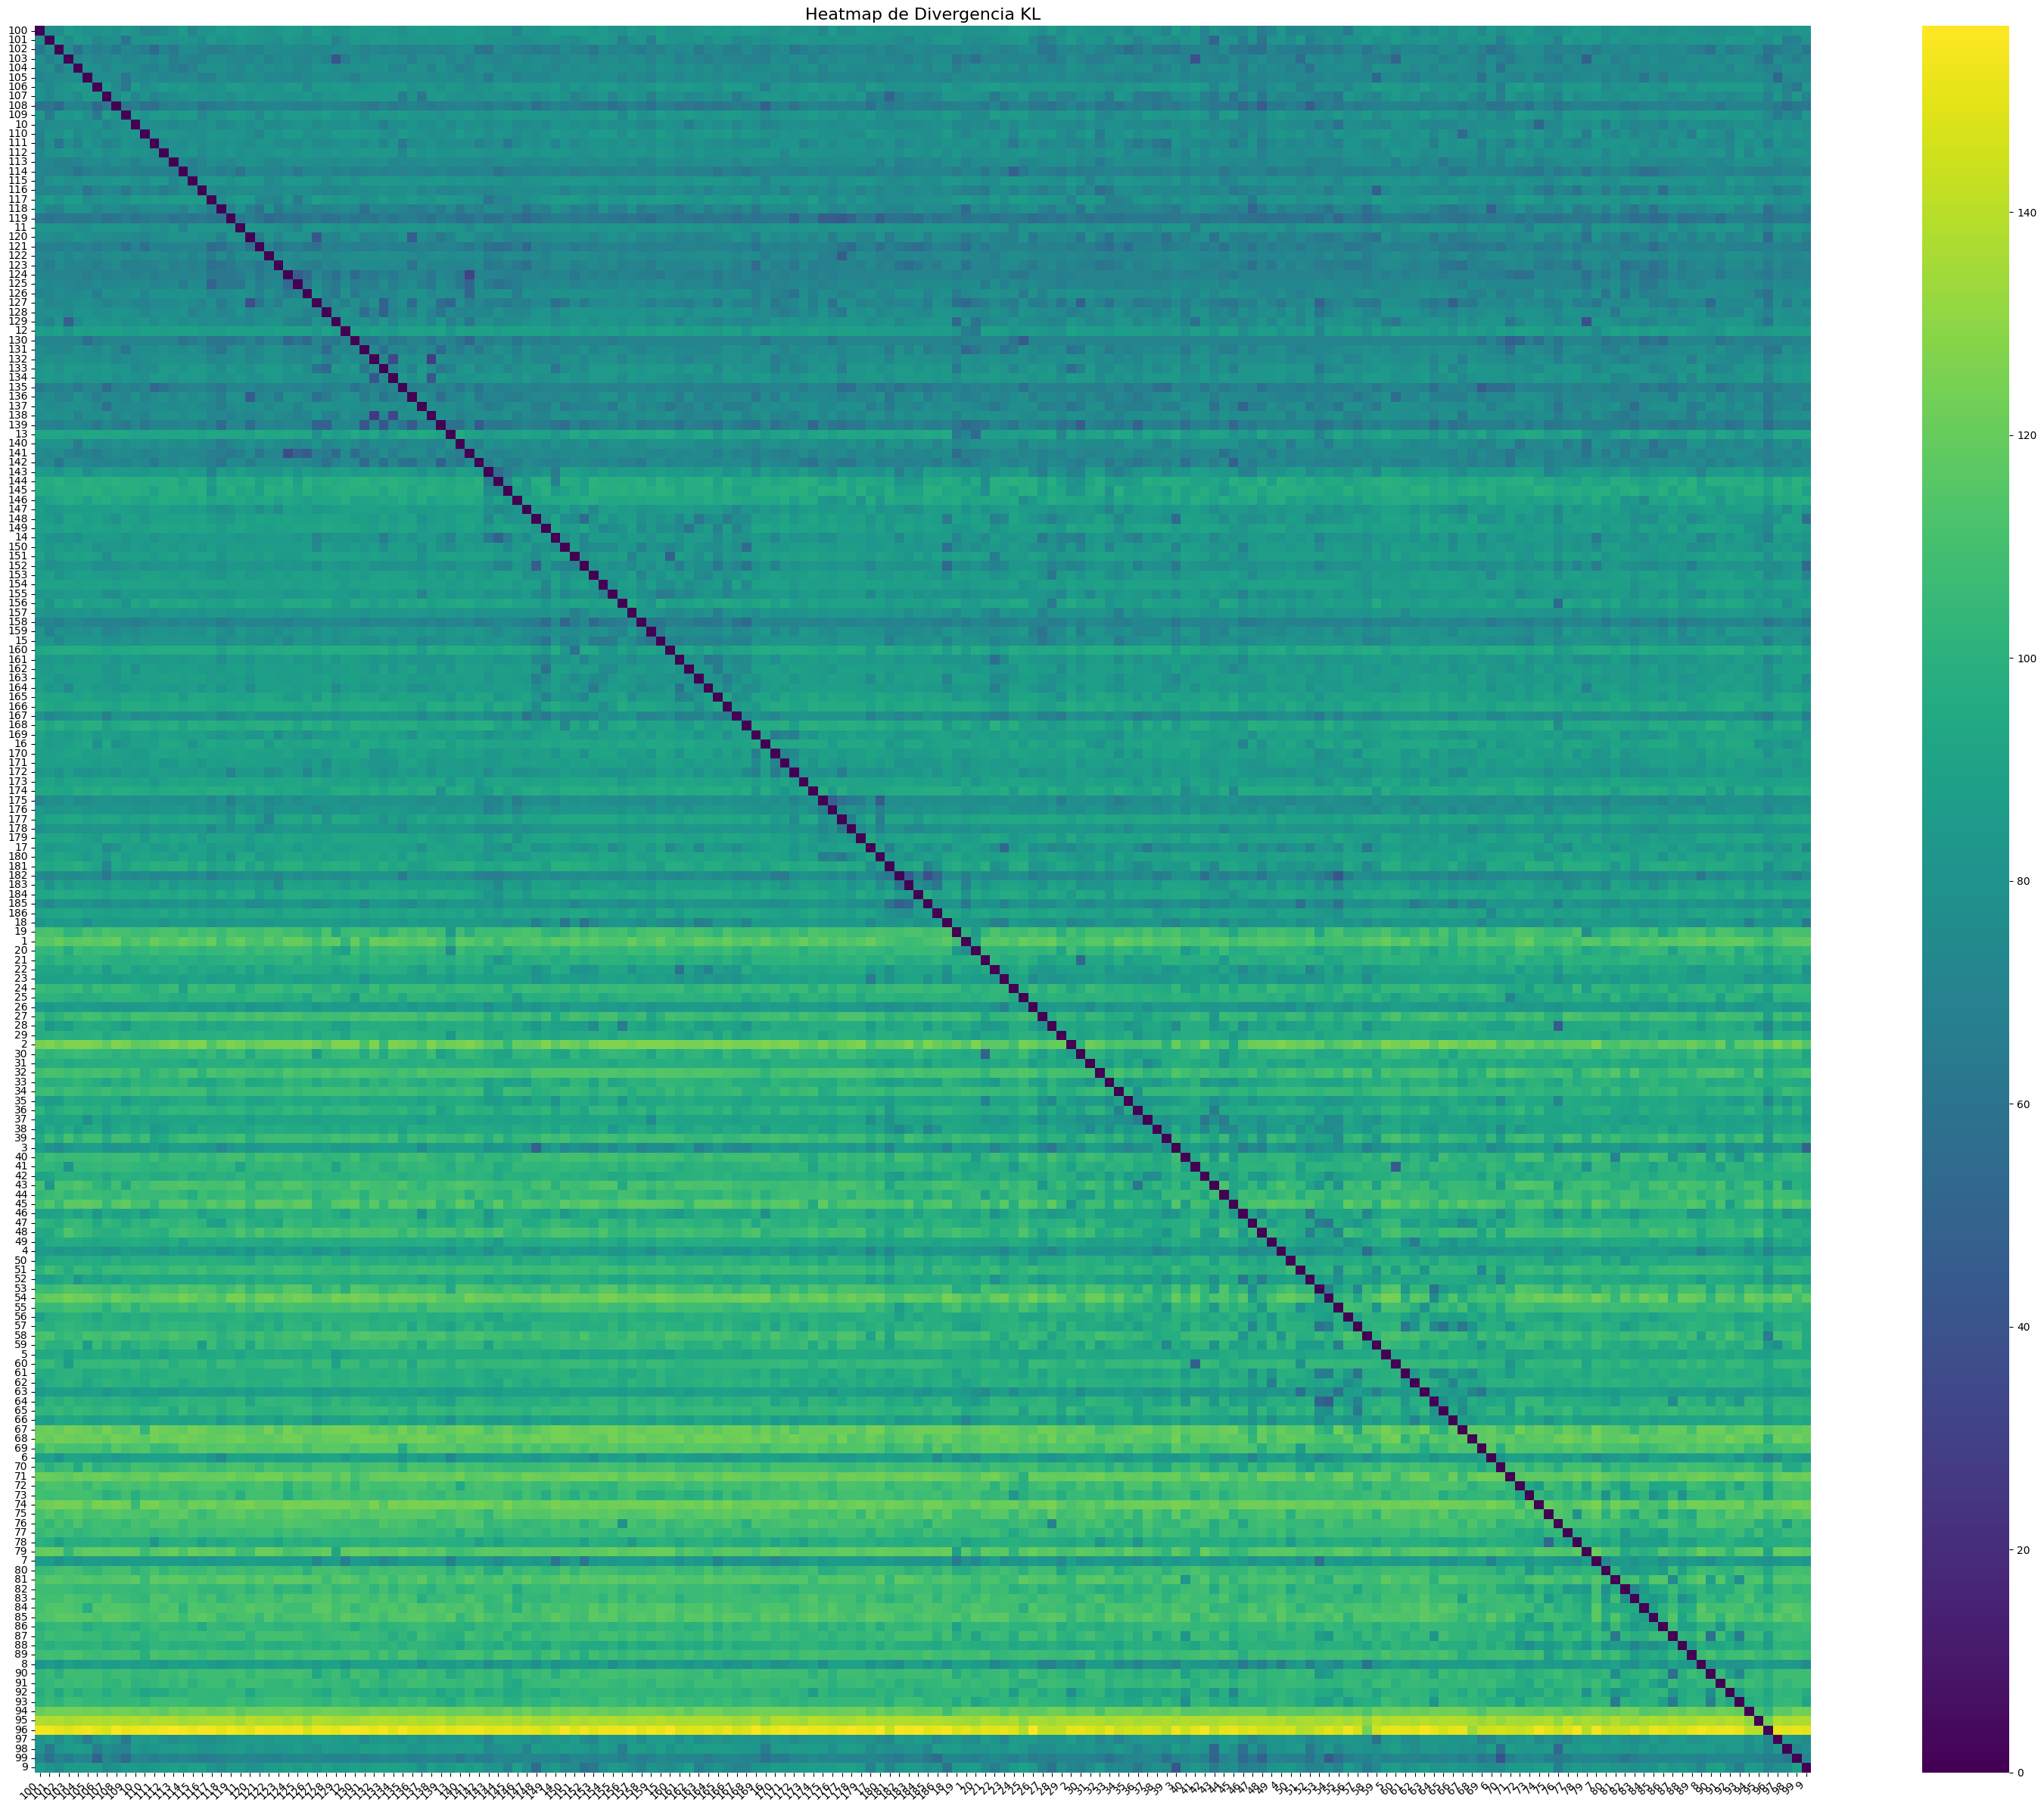

In [17]:
def kl_divergence(p, q):
    """Calcula la divergencia KL entre dos vectores de probabilidad."""
    p = np.clip(p, 1e-10, None)  # Evita log(0)
    q = np.clip(q, 1e-10, None)  # Evita log(0)
    return np.sum(p * np.log(p / q))

# Construir matriz de divergencia KL
kl_divergence_matrix = np.zeros((len(tfidf_vectors), len(tfidf_vectors)))
for i in range(len(tfidf_vectors)):
    for j in range(len(tfidf_vectors)):
        kl_divergence_matrix[i, j] = kl_divergence(tfidf_vectors[i], tfidf_vectors[j])

create_heatmap(kl_divergence_matrix, "Heatmap de Divergencia KL", file_names)

## Hamming Distance

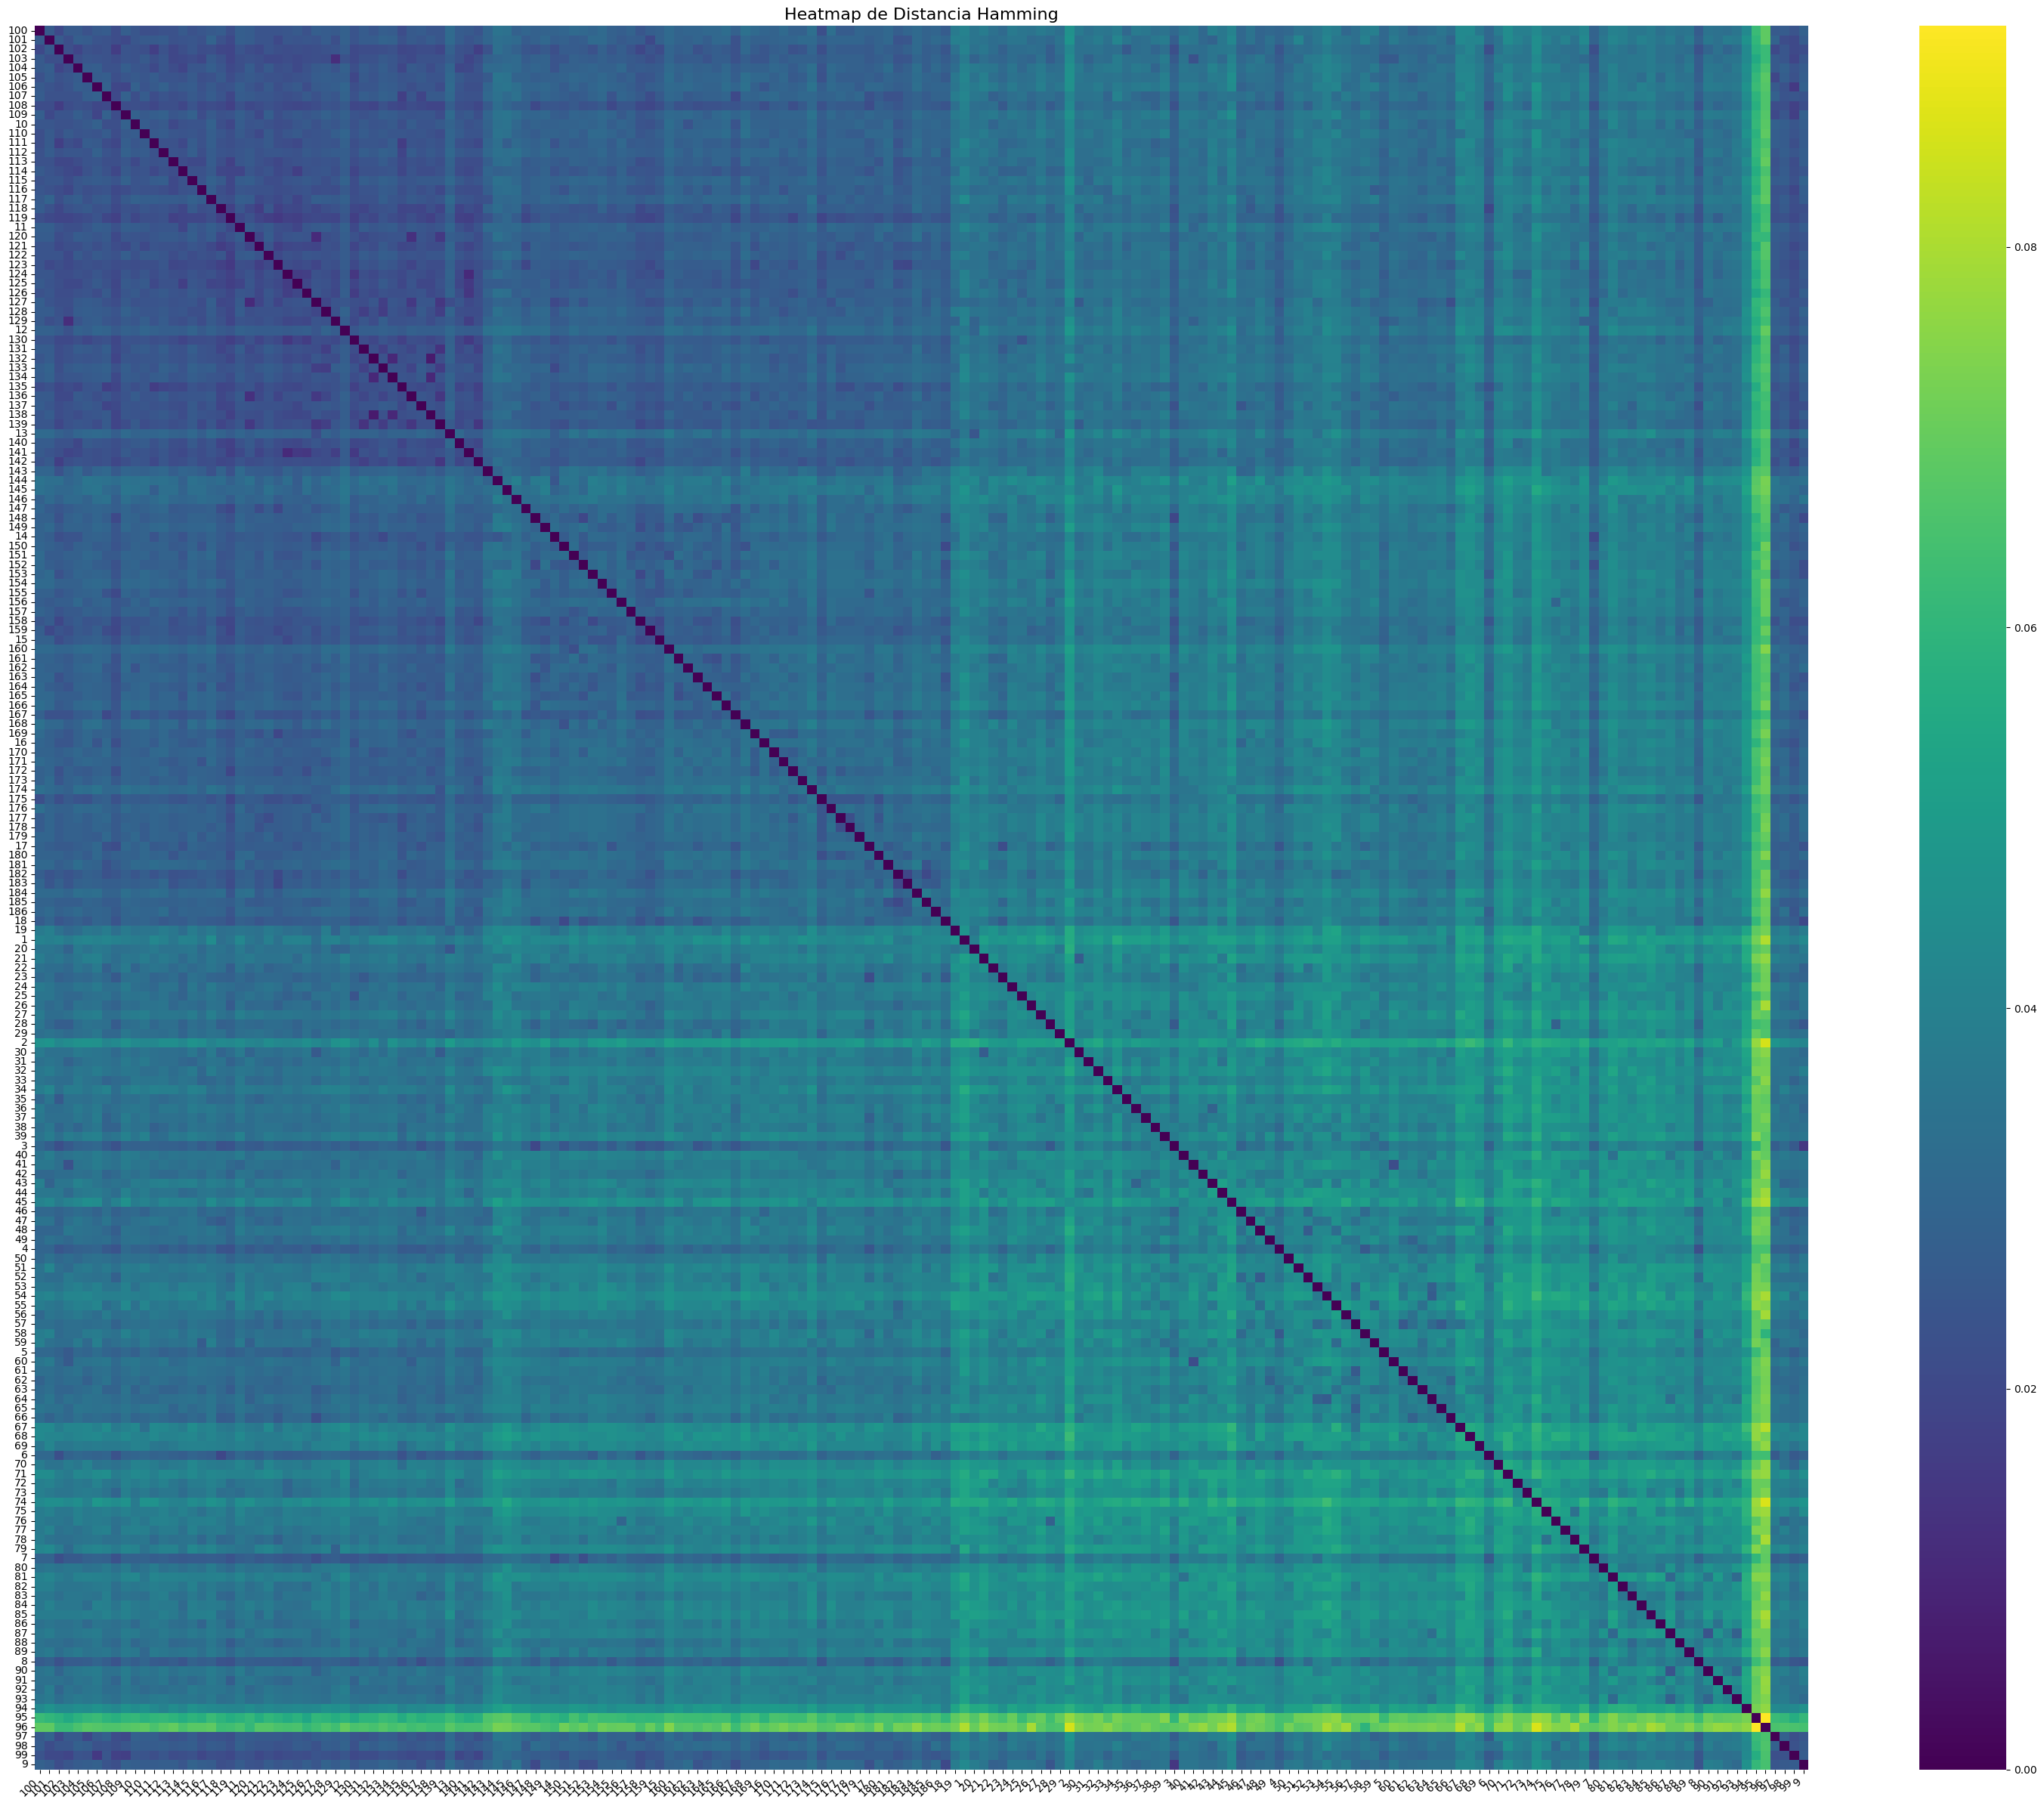

In [18]:
tfidf_binary = (tfidf_vectors > 0).astype(int)
hamming_distance_matrix = pairwise_distances(tfidf_binary, metric='hamming')
create_heatmap(hamming_distance_matrix, "Heatmap de Distancia Hamming", file_names)

## Bhattacharyya Distance

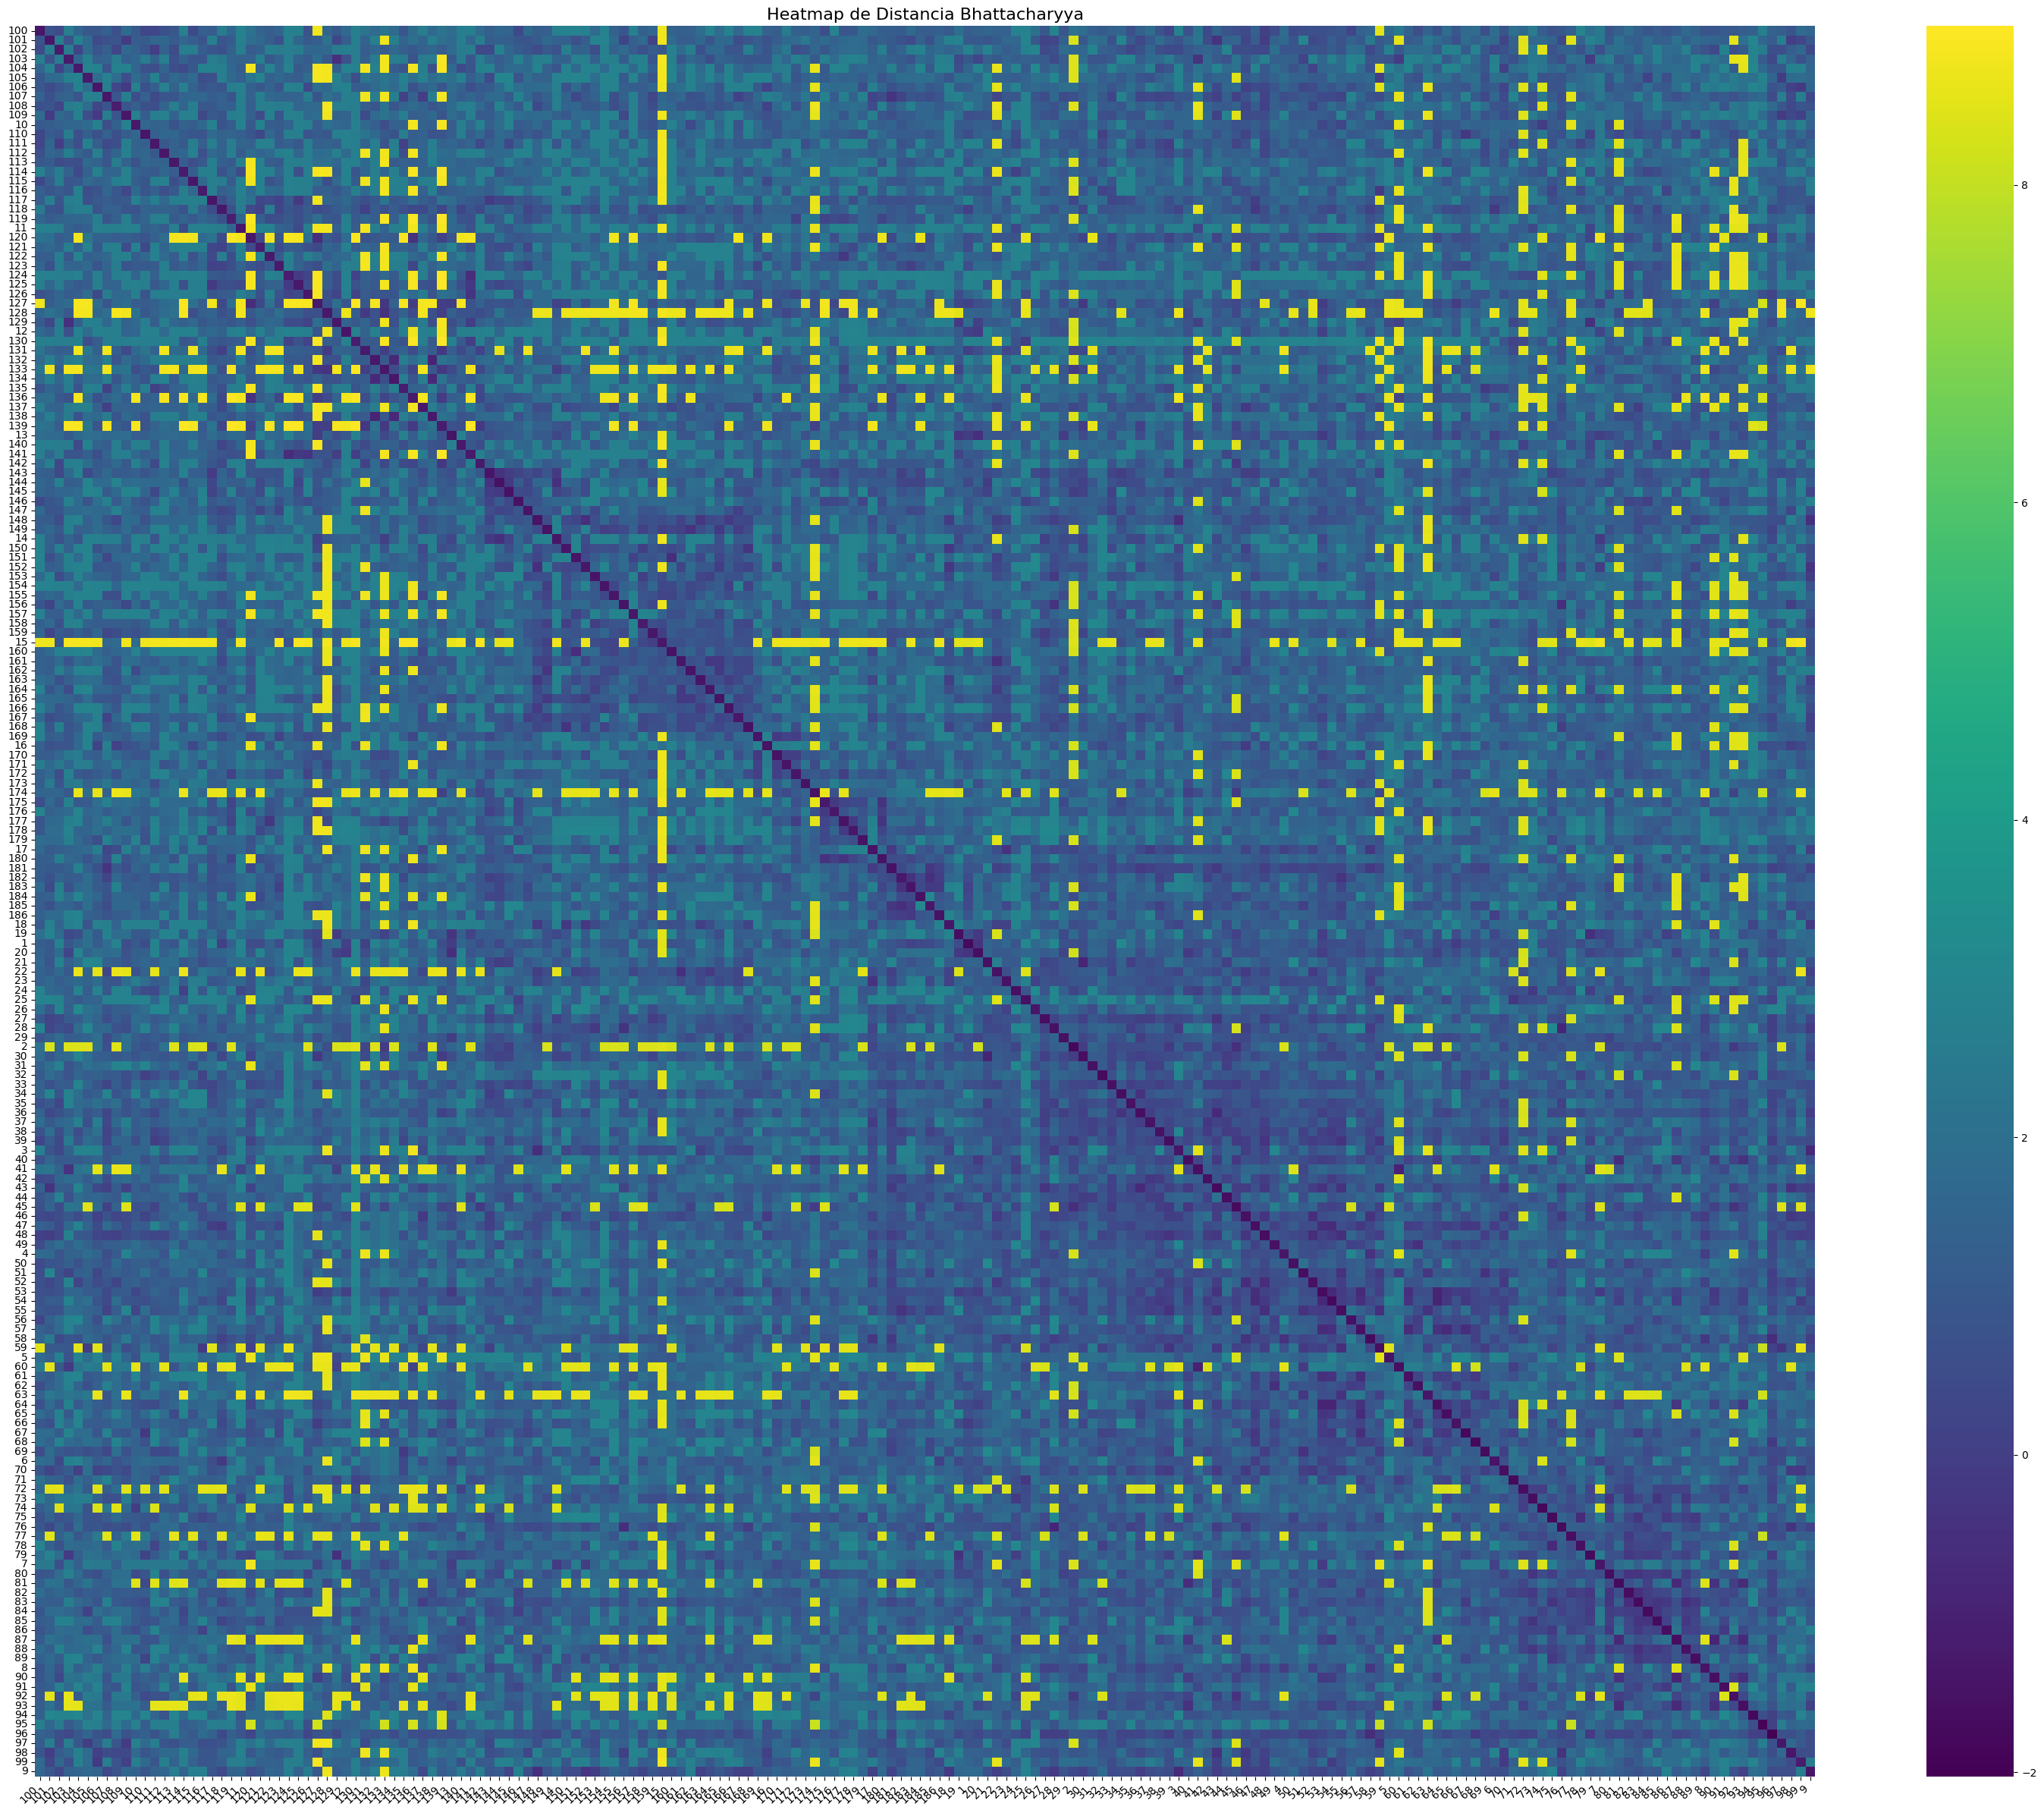

In [19]:
def bhattacharyya_distance(p, q):
    """Calcula la distancia de Bhattacharyya entre dos vectores."""
    p = np.clip(p, 1e-10, None)  # Evita problemas con log(0)
    q = np.clip(q, 1e-10, None)  # Evita problemas con log(0)
    return -np.log(np.sum(np.sqrt(p * q)))

# Construir matriz de distancia Bhattacharyya
bhattacharyya_distance_matrix = np.zeros((len(tfidf_vectors), len(tfidf_vectors)))
for i in range(len(tfidf_vectors)):
    for j in range(len(tfidf_vectors)):
        bhattacharyya_distance_matrix[i, j] = bhattacharyya_distance(tfidf_vectors[i], tfidf_vectors[j])

create_heatmap(bhattacharyya_distance_matrix, "Heatmap de Distancia Bhattacharyya", file_names)

## Dot Product

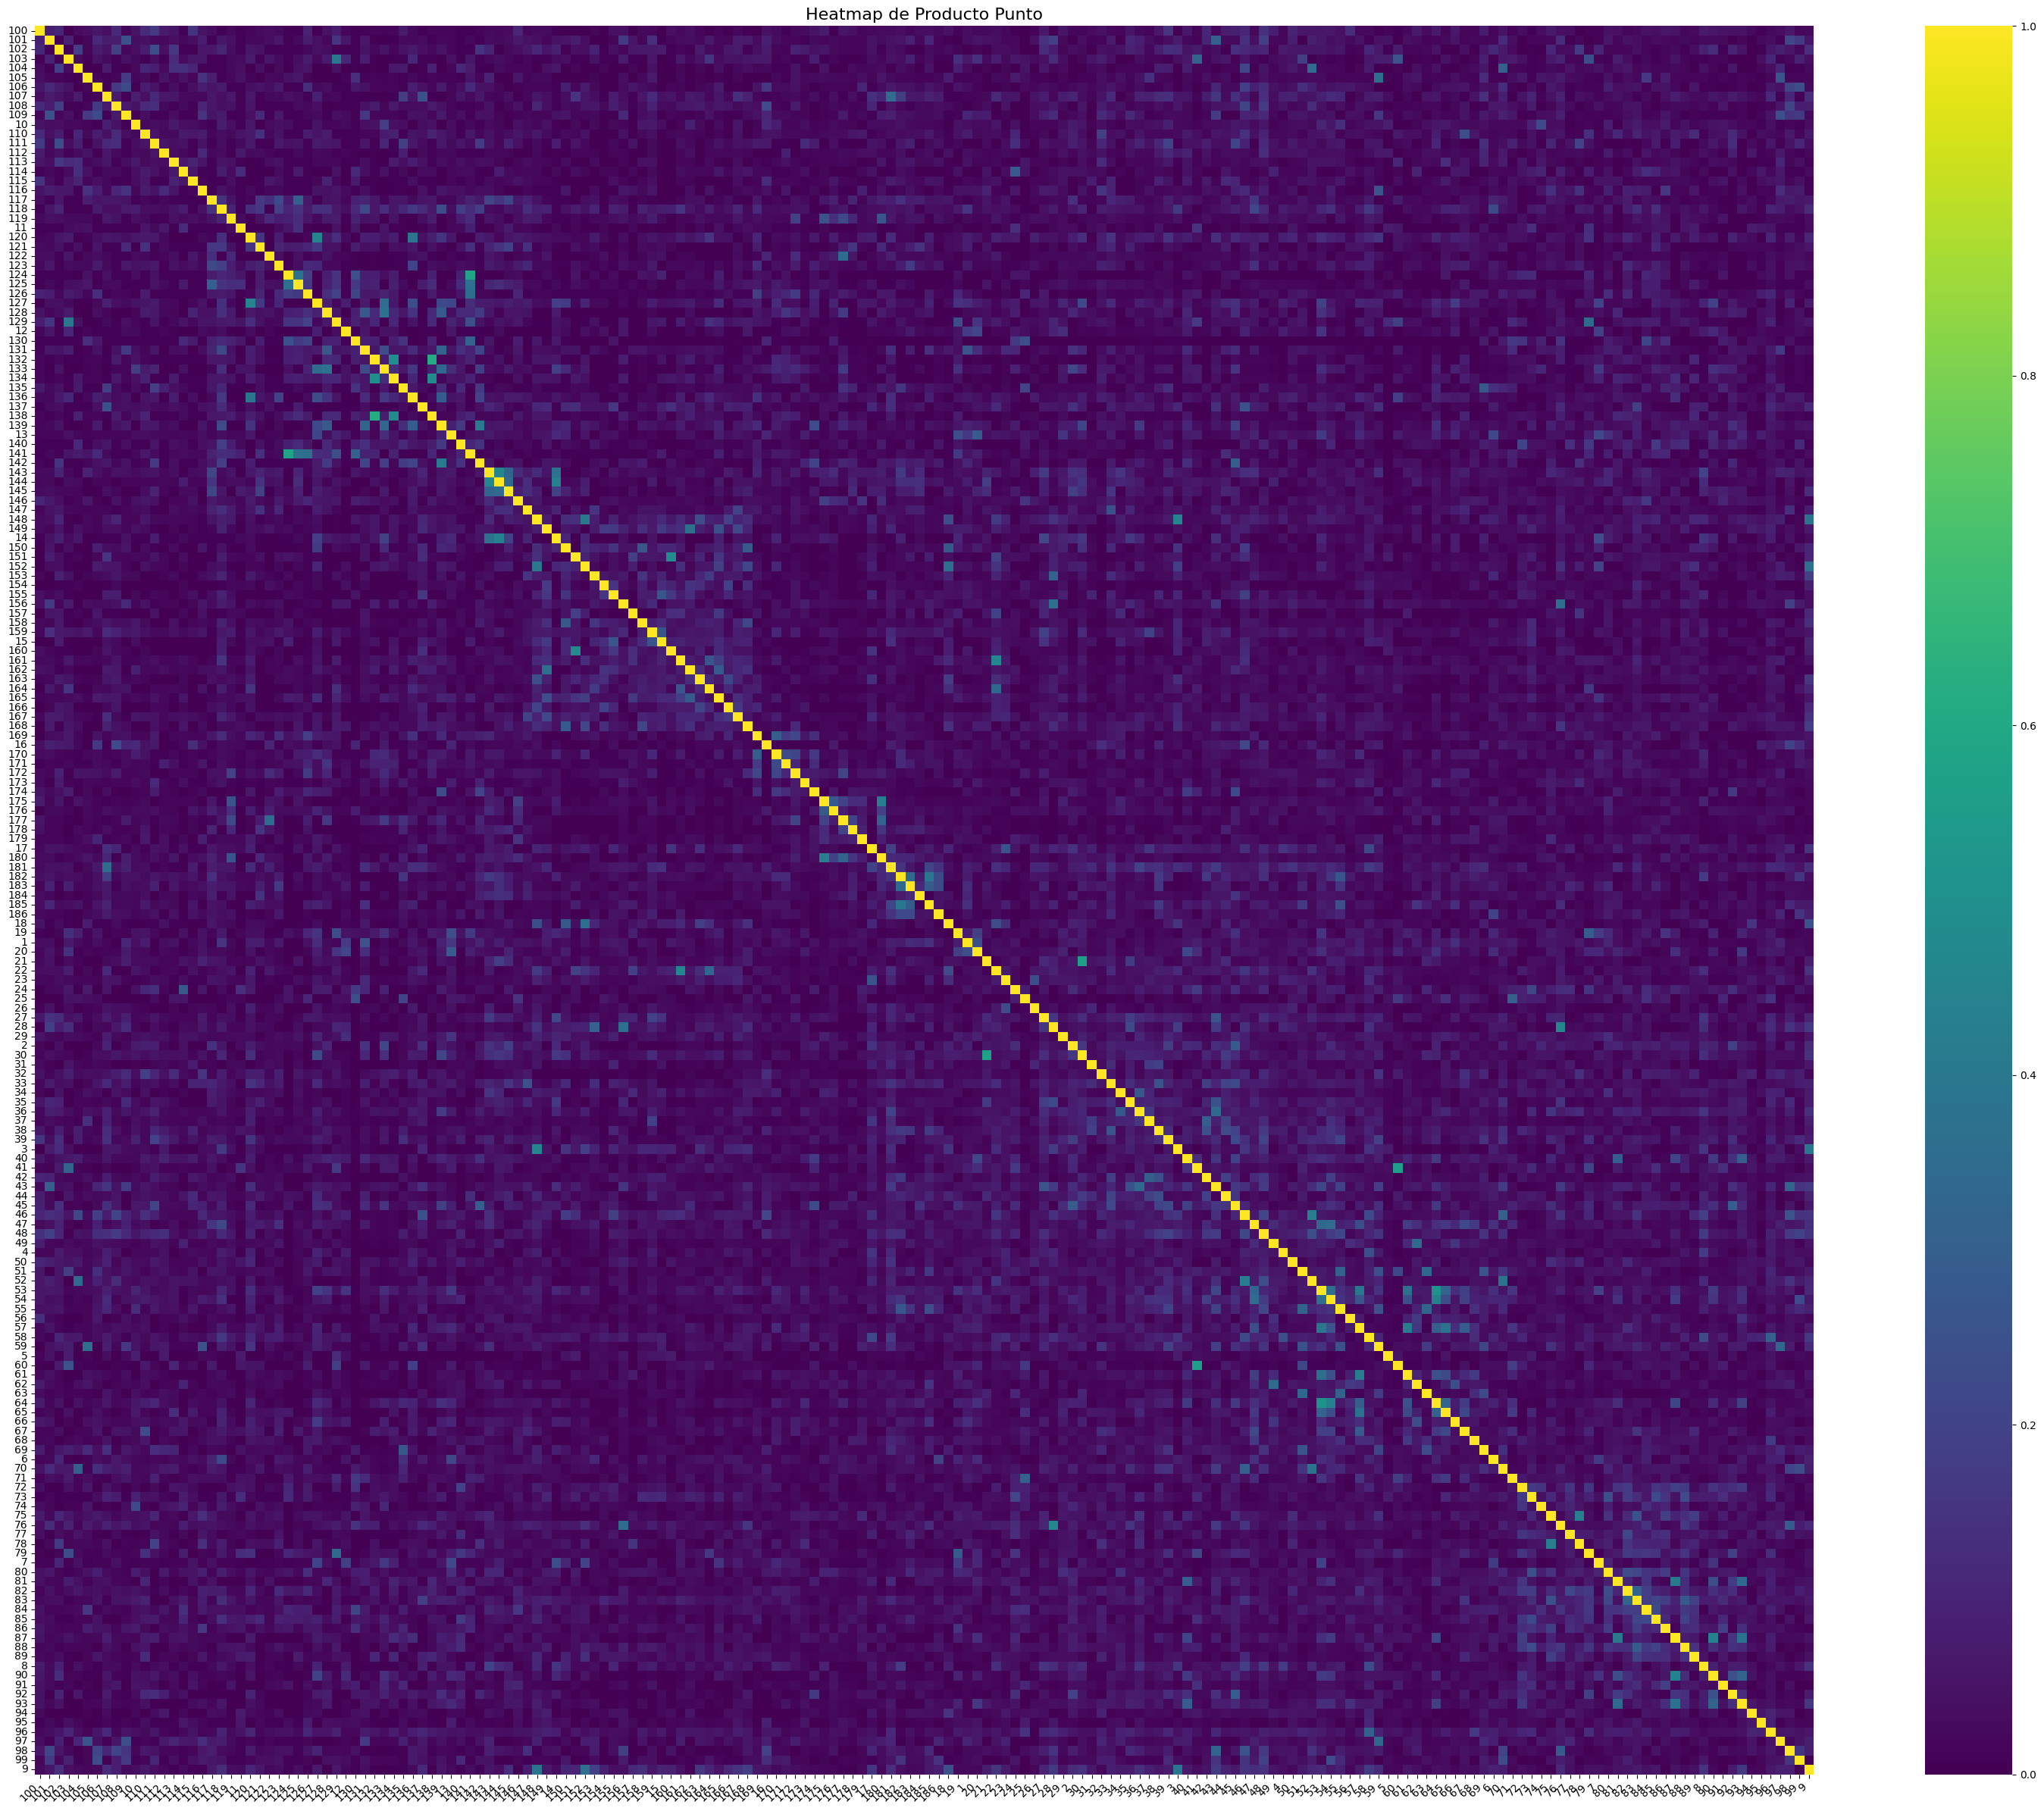

In [20]:
dot_product_matrix = np.dot(tfidf_vectors, tfidf_vectors.T)
create_heatmap(dot_product_matrix, "Heatmap de Producto Punto", file_names)